# UAS BIOINFORMATIKA

<p> Berikut ini adalah anggota dari kelompok 1: </p>

<ul>
<li> Abdul Hafidh (2008107010056) </li>
<li> Yoan Rifqi Candra (2008107010020) </li>
<li> Haris Daffa (2008107010059) </li>
<li> Teuku Nabil Muhhamad Dhuha (2008107010004) </li>
<li> Khairul Umam Albi (2008107010072) </li>

</ul>

# 1 Informasi Genetik

In [1]:
from Bio.Seq import Seq
from Bio import SeqIO

In [2]:
records = {}

for record in SeqIO.parse("coronavirus_nucleotide_sequences.fasta", "fasta"):
    records[record.id] = record.seq

# print top 5
print(list(records.items())[:5])

[('AB277133', Seq('GAACAATCTGTTTTTAAGCCTCAACCTGCAGGTGTTTTTACTGATCATGATGTT...TGT')), ('AB277120', Seq('GAACAATCTGGTTTTAAGCCTCAACCTGCAGGTGTTTTTACTCATCATGATGTT...TGT')), ('AB450865', Seq('GAACAATCTGTTTTTAAGCCTCAACCTGCAGGTGTTTTTACTGATCATGATGTT...TGT')), ('AB450878', Seq('GAACAATCTGTTTTTAAGCCTCAACCTGCAGGTGTTTTTACTGATCATGATGTT...TGT')), ('AB450881', Seq('GAACAATTTGTTTTTAAGCCTCAACCTGCAGGTGTTTTTACTGATCATGATGTT...TGT'))]


In [3]:
fasta_length = 0
for record in records:
    fasta_length += len(records[record])
  
print(fasta_length)

52763761


In [4]:
# Calculate ATGC in sequences
bases = {
    "A": 0,
    "T": 0,
    "C": 0,
    "G": 0
}
for record in records:
    for base in "ATCG":
        bases[base] += records[record].count(base)

# Rename A T C G to Adeine Thymine Cytosine Guanine
bases = {
    "Adeine": bases["A"],
    "Thymine": bases["T"],
    "Cytosine": bases["C"],
    "Guanine": bases["G"]
}

print(bases)

{'Adeine': 14367759, 'Thymine': 17496106, 'Cytosine': 9749020, 'Guanine': 11046422}


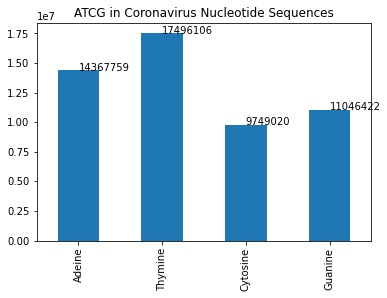

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dataframe
df_bases = pd.DataFrame.from_dict(bases, orient='index', columns=['Count'])

# plot the dataframe
df_bases.plot(kind='bar', title='ATCG in Coronavirus Nucleotide Sequences', legend=False)

# Add number on top of the bar
for index, value in enumerate(df_bases['Count']):
    plt.text(index, value, str(value))

plt.show()

In [6]:
# Using Bovine coronavirus isolate ICSA21-LBA, complete genome
sequence = records["MG757138"]

UGUGAGCGAUUUGCGUGCGUGCAUCCCGCUUCACUGAUCUCUUGUUAGAUCUUUUCAUAAUCUAAACUUUAUAAAAACAUCCACUCCCUGUAGUCUAUGCCUGUGGGCGUAGAUUUUUCAUAGUGGUGUCUAUUUUCAUUUCUGCUGUUAACAGCUUUCAGCCAGGGACGUGUUGUAUCCUAGGCAGUGGCCCACCCAUAGGUCACAAUGUCGAAGAUCAACAAAUACGGUCUCGAACUACACUGGGCUCCAGAAUUUCCAUGGAUGUUUGAGGACACAGAGGAGAAGUUGGACAACCCUAGUAGUUCAGAGGUGGAUAUAGUAUGCUCCACCACUGCGCAAAAGCUGGAAACAGGCGGAAUUUGUCCUGAAAAUCAUGUGAUGGUGGAUUGUCGCCGACUUCUUAAACAAGAGUGUUGUGUGCAGUCUAGCCUAAUACGUGAAAUUGUUAUGAAUACACGUCCAUAUGAUUUGGAGGUGCUACUUCAAGAUGCUUUGCAGUCCCGCGAAGCAGUUUUGGUUACACCCCCUCUAGGUAUGUCUUUGGAGGCAUGCUAUGUGAGAGGUUGUAAUCCUAAUGGAUGGACCAUGGGUUUGUUUCGGCGUAGAAGUGUGUGUAACACUGGUCGCUGCGCUGUUAACAAGCAUGUGGCCUAUCAGCUAUAUAUGAUUGAUCCUGCGGGUGUCUGUUUUGGUGCAGGUCAAUUUGUGGGUUGGGUUAUACCCUUAGCCUUUAUGCCUGUGCAAUCCCGGAAAUUUAUUGUUCCUUGGGUUAUGUACUUGCGCAAGUGUGGCGAAAAGGGUGCCUACAACAAAGAUCAUAAACGUGGCGGUUUUGGACACGUUUAUAAUUUUAAAGUUGAGGAUGCUUACGACUUGGUUCAUGAUGAGCCUAAGGGUAAGUUUUCUAAGAAGGCUUAUGCUUUGGUUAGAGGAUACCGUGGUGUUAAACCGCUUCUUUAUGUGGACCAGUAUGGUUGUGAUUAUACUGGUGGUCUUG

In [8]:
print(f'The genome consists of {len(sequence)} genetic bases or letters.')

The genome consists of 31026 genetic bases or letters.


In [10]:
#Count the nucleotides frequency in the DNA
DNA = sequence
nucleotides={}
for n in DNA:
    if n in nucleotides:
        nucleotides[n] += 1
    else:
        nucleotides[n] =  1
print(nucleotides)

#Create a dataframe
nts= pd.DataFrame(data=nucleotides, index=[0]).T.reset_index()
nts= nts.rename(columns={0: 'frequency', 'index': 'nucleotides'})
nts=nts.sort_values(by=['frequency'], ascending=True)

{'T': 11034, 'G': 6765, 'A': 8490, 'C': 4734, 'K': 2, 'N': 1}


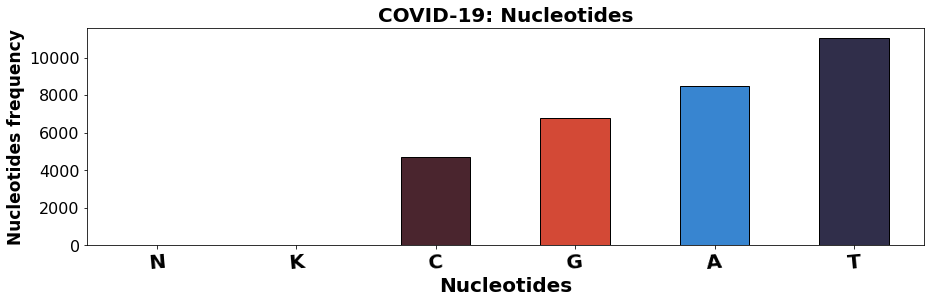

In [12]:
#plot the nucleotides frequency
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
a= nts['frequency'].plot.bar(color=sns.color_palette('icefire',4), edgecolor='black')
plt.xticks(rotation=5)
plt.ylabel("Nucleotides frequency", weight='bold', fontsize=17)
r=list(range(len(nts)))
plt.xticks(r, nts.nucleotides, weight='bold', fontsize=20)
plt.xlabel("Nucleotides", weight='bold', size=20)
plt.yticks(fontsize=16)
plt.title("COVID-19: Nucleotides", weight='bold', size=20)
plt.show()

# 2 Transkripsi

In [14]:
mRNA = sequence.transcribe()
print(mRNA)

UGUGAGCGAUUUGCGUGCGUGCAUCCCGCUUCACUGAUCUCUUGUUAGAUCUUUUCAUAAUCUAAACUUUAUAAAAACAUCCACUCCCUGUAGUCUAUGCCUGUGGGCGUAGAUUUUUCAUAGUGGUGUCUAUUUUCAUUUCUGCUGUUAACAGCUUUCAGCCAGGGACGUGUUGUAUCCUAGGCAGUGGCCCACCCAUAGGUCACAAUGUCGAAGAUCAACAAAUACGGUCUCGAACUACACUGGGCUCCAGAAUUUCCAUGGAUGUUUGAGGACACAGAGGAGAAGUUGGACAACCCUAGUAGUUCAGAGGUGGAUAUAGUAUGCUCCACCACUGCGCAAAAGCUGGAAACAGGCGGAAUUUGUCCUGAAAAUCAUGUGAUGGUGGAUUGUCGCCGACUUCUUAAACAAGAGUGUUGUGUGCAGUCUAGCCUAAUACGUGAAAUUGUUAUGAAUACACGUCCAUAUGAUUUGGAGGUGCUACUUCAAGAUGCUUUGCAGUCCCGCGAAGCAGUUUUGGUUACACCCCCUCUAGGUAUGUCUUUGGAGGCAUGCUAUGUGAGAGGUUGUAAUCCUAAUGGAUGGACCAUGGGUUUGUUUCGGCGUAGAAGUGUGUGUAACACUGGUCGCUGCGCUGUUAACAAGCAUGUGGCCUAUCAGCUAUAUAUGAUUGAUCCUGCGGGUGUCUGUUUUGGUGCAGGUCAAUUUGUGGGUUGGGUUAUACCCUUAGCCUUUAUGCCUGUGCAAUCCCGGAAAUUUAUUGUUCCUUGGGUUAUGUACUUGCGCAAGUGUGGCGAAAAGGGUGCCUACAACAAAGAUCAUAAACGUGGCGGUUUUGGACACGUUUAUAAUUUUAAAGUUGAGGAUGCUUACGACUUGGUUCAUGAUGAGCCUAAGGGUAAGUUUUCUAAGAAGGCUUAUGCUUUGGUUAGAGGAUACCGUGGUGUUAAACCGCUUCUUUAUGUGGACCAGUAUGGUUGUGAUUAUACUGGUGGUCUUG

In [15]:
print(f'DNA: {sequence[:50]}')
print(f'RNA: {mRNA[:50]}')

DNA: TGTGAGCGATTTGCGTGCGTGCATCCCGCTTCACTGATCTCTTGTTAGAT
RNA: UGUGAGCGAUUUGCGUGCGUGCAUCCCGCUUCACUGAUCUCUUGUUAGAU


# 3 Translasi

In [16]:
amino_acid = mRNA.translate()

print(amino_acid[:40])

CERFACVHPASLISC*IFS*SKLYKNIHSL*SMPVGVDFS


In [17]:
print(f"This genome has {len(amino_acid)} amino acids")

This genome has 10342 amino acids


In [18]:
Proteins = amino_acid.split('*')
Proteins[:5]

[Seq('CERFACVHPASLISC'),
 Seq('IFS'),
 Seq('SKLYKNIHSL'),
 Seq('SMPVGVDFS'),
 Seq('WCLFSFLLLTAFSQGRVVS')]

In [19]:
print(f'We have {len(Proteins)} amino acid chains in the genome')

We have 295 amino acid chains in the genome


#### RECAP:

    1- We started our analysis with the whole genome, that has 31026 nucleotides.
 
    2- Transcribed the DNA or copied it out to an mRNA.

    3- The mRNA was translated to 10342 amino acids.
 
    4- The amino acid sequences were split at the stop codons.
 
    5- We ended up with 295 amino acid chains.

*(We filter and keep just the proteins with more than 50 amino acids to have a shorter list of proteins to analyse).*

In [20]:
for i in Proteins[:]:
    if len(i) < 50:
        Proteins.remove(i)

In [22]:
print(f'We have {len(Proteins)} proteins with  more than 50 amino acids in the genome')

We have 16 proteins with  more than 50 amino acids in the genome


In [23]:
proteinas=pd.DataFrame(Proteins)
proteinas['amino acid sequence'] = proteinas[0].apply(str)
proteinas['Protein length'] = proteinas[0].apply(len)
proteinas.rename(columns={0: "sequence"}, inplace=True)
pro=proteinas.drop('sequence', axis=1)
pro_= pro.sort_values(by=['Protein length'], ascending=False)

In [24]:
pd.options.display.max_colwidth = 80
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)

s = pro_.style.background_gradient(cmap=cm)
s

In [25]:
pro_

,amino acid sequence,Protein length
0,VTMSKINKYGLELHWAPEFPWMFEDTEEKLDNPSSSEVDIVCSTTAQKLETGGICPENHVMVDCRRLLKQECCVQS...,4385
11,CLDHNLNMFLILLISLPTAFAVIGDLKCTTVSINDVDTGVPSISTDTVDVTNGLGTYYVLDRVYLNTTLLLNGYYP...,1370
14,GCLLLLVSNPVVERPLEIVLVMASLSGPISPTNLEMFKPGVEELNPSKLLLLSNHQEGMLYPTILGSLELLSFKRE...,228
8,VLIPLVGSCSVLCLKLPCSATDILCVMILATQKRLPVSKILILSSMMPNQLLSLSRLFCILLRHIRTLLKMVCVCF...,97
2,IMLIDYLILYSMILLITSSNCLISILSTGVCHTILTRLIVRMIGVSYIVLILTYFLVWFYLIHVLGLLLGKFLWMV...,92
13,MFMADAYFADTVWYVGQIIFIVAICLLVIIVVVAFLATFKLCIQLCGMCNTLVLSPSIYVFNRGRQFYEFYNDVKP...,84
4,APLNFMAAGMTCYVALLKMLIILYLWVGIILSVIVLCQTYYVLLVVWFWLENMRHVVRKAIGFIDLRMNAHKF,73
7,VVRFLVMFALNVPQLIILELVTMVVGAIVLHVITCIIHLLLIFNSGDILVLYQVIMIYIVVSTKEHMLLPLML,73
12,GRAYYNSYHNACCLVGTVSYITSKSVMQMATTIDDTDYTNIKPITVFTTVYLGGFIGIDTSTTGLLFSWY,70
3,KLFISILRFMMVGVYQHHKSLLIIMIRVLAIHLISLEKPGYIMKHYHLRSRMKFTLILSVMSCQHLLK,68


# 4 Membaca Frames